In [1]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LassoCV
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import mean_squared_error, r2_score

diabetes = datasets.load_diabetes()
# X is the 10 variables obtained for each person in the study
X = diabetes.data
# diabetes.target is a quantitative measure of disease progression one year after baseline
y = diabetes.target

In [2]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

# A)

Text(0, 0.5, 'Disease progression')

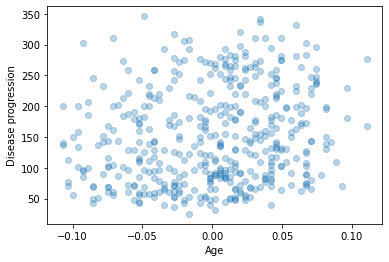

In [3]:
X_age=diabetes.data[:, [0]]
plt.scatter(X_age, y, alpha=0.3)
plt.xlabel("Age")
plt.ylabel("Disease progression")

Text(0, 0.5, 'Disease progression')

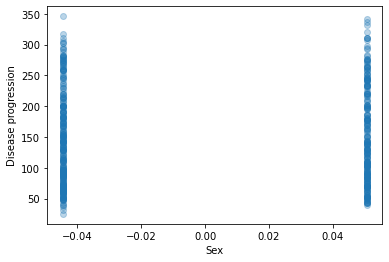

In [4]:
X_sex=diabetes.data[:, [1]]
plt.scatter(X_sex, y, alpha=0.3)
plt.xlabel("Sex")
plt.ylabel("Disease progression")

Text(0, 0.5, 'Disease progression')

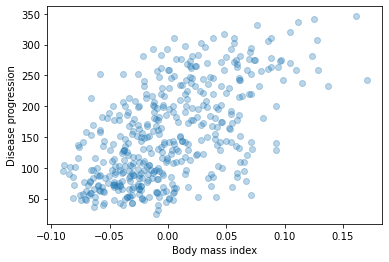

In [5]:
X_BMI = diabetes.data[:, [2]]
plt.scatter(X_BMI, y, alpha=0.3)
plt.xlabel("Body mass index")
plt.ylabel("Disease progression")

Text(0, 0.5, 'Disease progression')

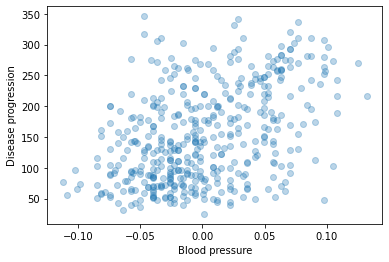

In [6]:
X_bp = diabetes.data[:, [3]]
plt.scatter(X_bp, y, alpha=0.3)
plt.xlabel("Blood pressure")
plt.ylabel("Disease progression")

# B)

In [7]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_BMI, y)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(X_BMI)

In [8]:

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y, diabetes_y_pred))
# The root mean squared error
print('Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(y, diabetes_y_pred)))

Mean squared error: 3890.46
Coefficient of determination: 0.34
Root mean squared error: 62.37


# C)

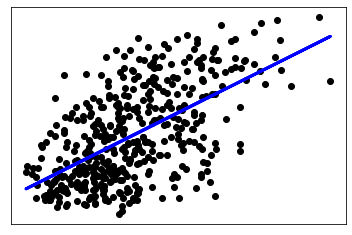

In [9]:
# Plotting test samples with BMI and the corrosponding inear regression attempt
plt.scatter(X_BMI, y,  color='black')
plt.plot(X_BMI, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# D)

In [10]:
## Residual calculating: Observed value - Predeicted value 
# Source https://www.statology.org/standardized-residuals-python/
residual_test= y - diabetes_y_pred

Text(0.5, 0, 'Residuals')

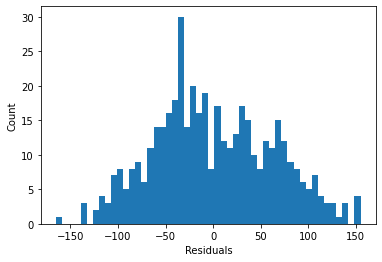

In [11]:
plt.hist(residual_test,bins=50)
plt.ylabel('Count')
plt.xlabel('Residuals')

# E)

In [12]:
X_4=diabetes.data[:, 0:4]
print(X_4.shape)

(442, 4)


In [13]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_4, y)


LinearRegression()

In [14]:
# Make predictions using the testing set
diabetes_y_pred = regr.predict(X_4)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y, diabetes_y_pred))
# The root mean squared error
print('Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(y, diabetes_y_pred)))

Mean squared error: 3556.38
Coefficient of determination: 0.40
Root mean squared error: 59.64


# F)

In [15]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X, y)
# Make predictions using the testing set
diabetes_y_pred = regr.predict(X)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y, diabetes_y_pred))
# The root mean squared error
print('Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(y, diabetes_y_pred)))

Mean squared error: 2859.69
Coefficient of determination: 0.52
Root mean squared error: 53.48


# G)

In [16]:
from sklearn.model_selection import train_test_split
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = train_test_split(diabetes.data, 
                                                                                        diabetes.target, 
                                                                                        test_size=0.3,
                                                                                        random_state=0)


In [17]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))
# The root mean squared error
print('Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(diabetes_y_test, diabetes_y_pred)))

Mean squared error: 3097.15
Coefficient of determination: 0.39
Root mean squared error: 55.65


In [18]:
print(diabetes_X_train.shape)
print(diabetes_X_test.shape)

(309, 10)
(133, 10)


In [19]:
## Vi skal træne en model for at predicte nye samples! Ved spørgsmål f har den trænet på alt data og dermed predictet på den data den har trænet på = dårligt!